# AISHWARYA SRIVASTAVA - Data Science & Business Analytics Intern at 'The Sparks Foundation'

## TASK 1- Prediction Using Supervized Machine Learning 

#### PREDICT THE PERCENTAGE OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS

### METHOD 1: Linear Regression with Python Scikit Learn

In [4]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [18]:
#loading the data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Let's explore the top 5 rows of the df
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
#Exploring the descriptive statistics of the variables
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Declare the inputs(independent variable-x) and the targets(dependent variable-y)
y=data['Scores']
x=data['Hours']

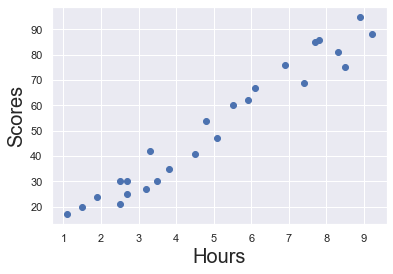

In [39]:
#Exploring the data
plt.scatter(x1,y)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

In [9]:
#Checking the shapes of x and y
x.shape, y.shape

((25,), (25,))

In [20]:
# In order to feed x to sklearn,we must reshape it and make it a 2D array (a matrix)
x_matrix=x.values.reshape(-1,1)
x_matrix.shape

(25, 1)

In [11]:
#creating a linear regression object
reg=LinearRegression()

#fitting the regression,note that the first argument is the independent variable, while the second - the dependent
reg.fit(x_matrix,y)

LinearRegression()

In [12]:
#Getting the parameters of the linear regression
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [13]:
# Finding the R-squared of the linear regression in sklearn 
reg.score(x_matrix,y)

0.9529481969048356

In [14]:
# Finding the coefficients for each input of the linear regression 
reg.coef_

array([9.77580339])

In [22]:
## Getting the intercept of the regression
reg.intercept_

2.483673405373196

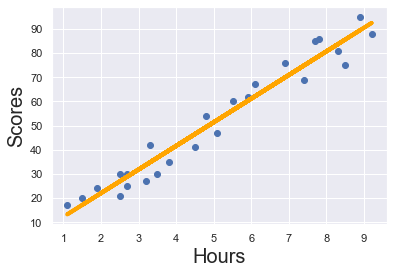

In [23]:
# matplotlib code for plotting the data
plt.scatter(x,y)

# Parametrized version of the regression line
yhat = reg.coef_*x_matrix + reg.intercept_

# Non-parametrized version of the regression line
#yhat = 9.7758*x + 2.4836

# Plotting the regression line
fig = plt.plot(x,yhat, lw=4, c='orange', label ='regression line')

# Labelling our axes
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

In [24]:
#This method returns the predictions of the linear regression for some new input
reg.predict([[9.25]])

array([92.90985477])

### METHOD 2: Linear Regression with Python using StatsModels

In [26]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [36]:
#loading the data
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

# Let's explore the top 5 rows of the df
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
#Exploring the descriptive statistics of the variables
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
#Declare the inputs(independent variable-x) and the targets(dependent variable-y)
y=data['Scores']
x1=data['Hours']

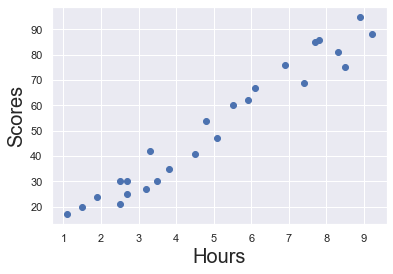

In [40]:
##Exploring the data
plt.scatter(x1,y)
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

In [41]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)

# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           9.13e-17
Time:                        16:37:51   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

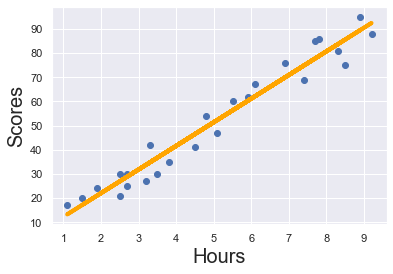

In [42]:
# Create a scatter plot
plt.scatter(x1,y)

# Define the regression equation, so we can plot it later
yhat=2.4837+9.7758*x1

# Plot the regression line against the independent variable 
fig=plt.plot(x1,yhat,lw=4,c='orange',label='regression line')

# Label the axes
plt.xlabel('Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.show()

In [43]:
#This method returns the predictions of the linear regression for some new input
predictions=results.predict(pd.DataFrame({'const':1,'Hours':[9.25]}))
predictions

0    92.909855
dtype: float64